In [54]:
# Listing 3.1 page 68
from keras.datasets import imdb

In [55]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [56]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [57]:
train_labels[0]

1

In [58]:
max([max(sequence) for sequence in train_data])

9999

In [59]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [60]:
# Listing 3.2 page 69
import numpy as np

In [61]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [62]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [63]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [64]:
# You should also vectorize your labels, which is straighforward
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [65]:
y_train[0]

1.0

In [66]:
# Listing 3.3 page 72
from keras import models
from keras import layers

In [67]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [68]:
# Listing 3.4 page 73
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [69]:
# Listing 3.5 page 73
from keras import optimizers

In [70]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [71]:
# Listing 3.6 page 72
from keras import losses
from keras import metrics

In [72]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

In [73]:
# Listing 3.7 page 72
# Validating your approach
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [74]:
# Listing 3.8 page 73
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 34ms/step - loss: 0.5835 - acc: 0.7262 - val_loss: 0.3882 - val_acc: 0.8726
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3285 - acc: 0.8996 - val_loss: 0.3150 - val_acc: 0.8806
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2307 - acc: 0.9276 - val_loss: 0.2905 - val_acc: 0.8846
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1789 - acc: 0.9464 - val_loss: 0.2761 - val_acc: 0.8899
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1473 - acc: 0.9548 - val_loss: 0.2873 - val_acc: 0.8858
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1162 - acc: 0.9649 - val_loss: 0.3063 - val_acc: 0.8825
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0987 - acc: 0.9706 - val_loss: 0.3080 - val_acc: 0.8840
Epoch 8/20
30/30 [==============================] - 0s 17ms/step - loss: 0.0796 - a

In [75]:
history_dict = history.history
history_dict.keys()
[u'acc', u'loss', u'val_acc', u'val_loss']

['acc', 'loss', 'val_acc', 'val_loss']

In [76]:
# Listing 3.9 page 74
import matplotlib.pyplot as plt

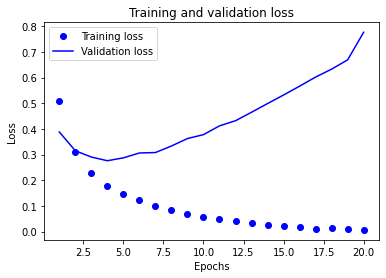

In [77]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Missing in the textbook
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)

# bo is for blue dot
plt.plot(epochs, loss_values, 'bo', label='Training loss')

# b is for solid blue line
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

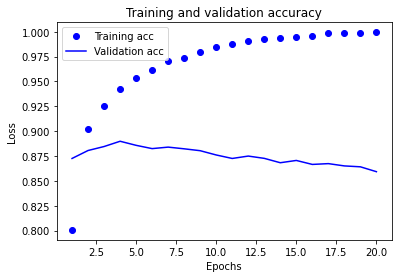

In [79]:
# Listing 3.10 page 75
# Clears the figures
plt.clf()
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [80]:
# Listing 3.11 page 76
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 12ms/step - loss: 0.5419 - accuracy: 0.7583
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2716 - accuracy: 0.9088
Epoch 3/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2002 - accuracy: 0.9292
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2929 - accuracy: 0.8855


In [81]:
results

[0.29288068413734436, 0.8854799866676331]

In [82]:
model.predict(x_test)

array([[0.19961956],
       [0.99972963],
       [0.9110986 ],
       ...,
       [0.12621135],
       [0.06926787],
       [0.538099  ]], dtype=float32)